In [2]:
import pandas as pd
import matplotlib.pyplot as plt

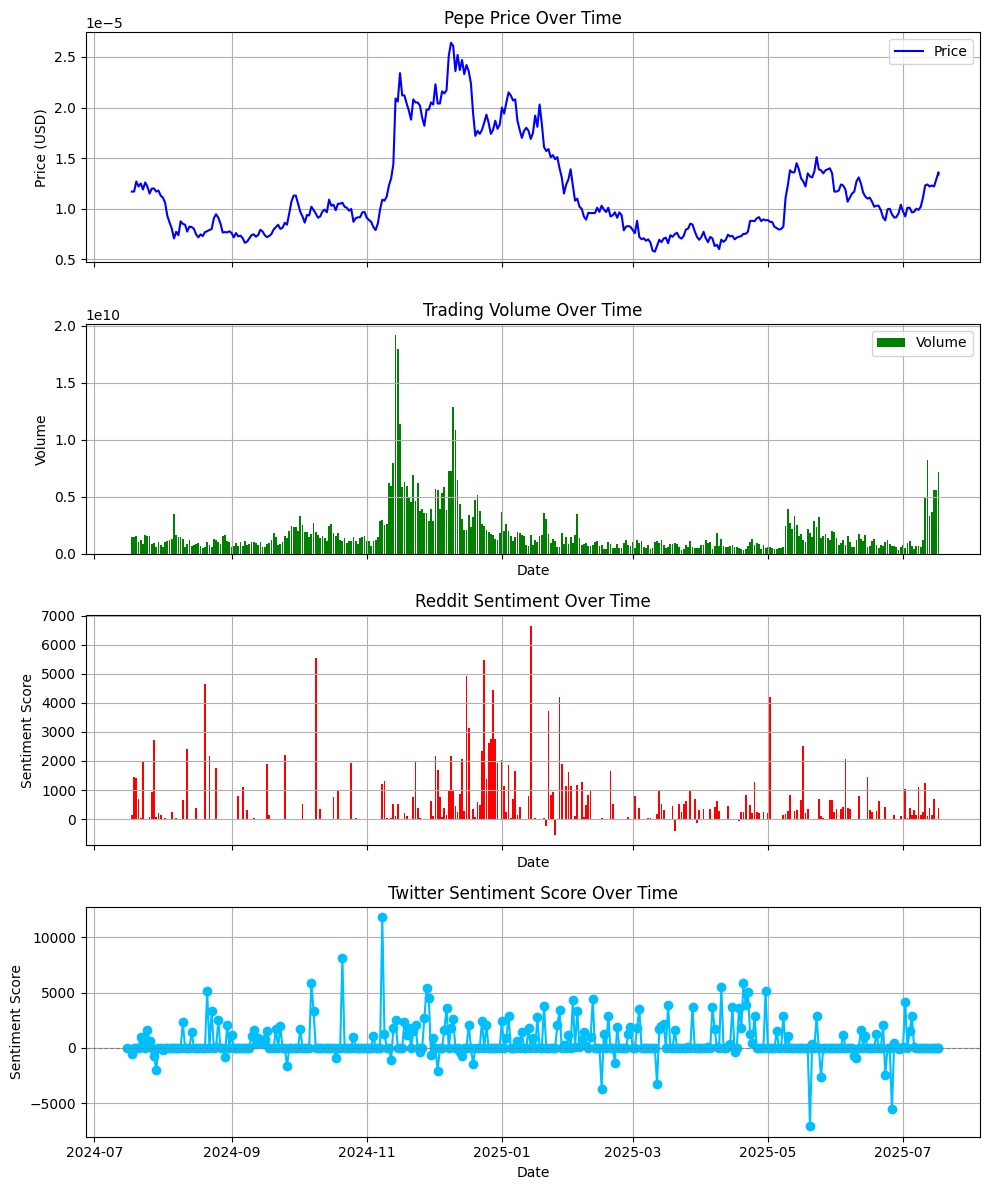

In [3]:
csv_data = 'training_data/pepe_final.csv'
df = pd.read_csv(csv_data)
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10, 12))

# Plot 1: Price vs. Date (on the first subplot, ax1)
ax1.plot(df['Date'], df['price'], color='blue', label='Price')
ax1.set_title('Pepe Price Over Time')
ax1.set_ylabel('Price (USD)')
ax1.grid(True)
ax1.legend()

# Plot 2: Volume vs. Date (on the second subplot, ax2)
ax2.bar(df['Date'], df['volume'], color='green', label='Volume')
ax2.set_title('Trading Volume Over Time')
ax2.set_xlabel('Date')
ax2.set_ylabel('Volume')
ax2.grid(True)
ax2.legend()

ax3.bar(df['Date'], df['reddit_sentiment_score'], color='red', label='Reddit Sentiment')
ax3.set_title('Reddit Sentiment Over Time')
ax3.set_xlabel('Date')
ax3.set_ylabel('Sentiment Score')
ax3.grid(True)

ax4.plot(df['Date'], df['twitter_sentiment_score'], color='deepskyblue', marker='o', linestyle='-')
ax4.set_title('Twitter Sentiment Score Over Time')
ax4.set_ylabel('Sentiment Score')
ax4.set_xlabel('Date') # Set the x-axis label only on the bottom plot
ax4.axhline(0, color='grey', linewidth=0.8, linestyle='--') # Adds a zero line
ax4.grid(True)


plt.tight_layout()
plt.show()


**Analysis**

From the data, we can see that sentiment in the reddit side is almost exclusively positive. Indiciates that general sentiment in the community trends positive. However, spikes in sentiment seem to correlate to large changes in price. 

Twitter sentiment seems to more follow closely the price raises and drops. There is enough basis to train an LSTM to determine a possible pattern

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import LSTM, Dense, Dropout, GRU
from sklearn.utils import class_weight

Loading and preprocessing data...
Data preprocessing complete.

Training data shape: (281, 14, 7)
Testing data shape: (71, 14, 7)
Building LSTM model...
Model built successfully.


C:\Users\chris\AppData\Local\Temp\ipykernel_16828\656437234.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_features[col].fillna(df_features['price'], inplace=True)
C:\Users\chris\AppData\Local\Temp\ipykernel_16828\656437234.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features[col].fillna(df_features['price'], inplace=True)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 14, 50)         │        11,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 14, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 14, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 14, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,051 (203.32 KB)

 Trainable params: 52,051 (203.32 KB)

 Non-trainable params: 0 (0.00 B)


Training the model...
Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0706 - val_loss: 0.0179
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0214 - val_loss: 0.0116
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0162 - val_loss: 0.0092
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0157 - val_loss: 0.0083
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0144 - val_loss: 0.0073
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0133 - val_loss: 0.0074
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0144 - val_loss: 0.0074
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0127 - val_loss: 0.0069
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0146 - val_loss: 0.0091
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0136 - val_loss: 0.0064
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0114 - val_loss: 0.0059
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.01

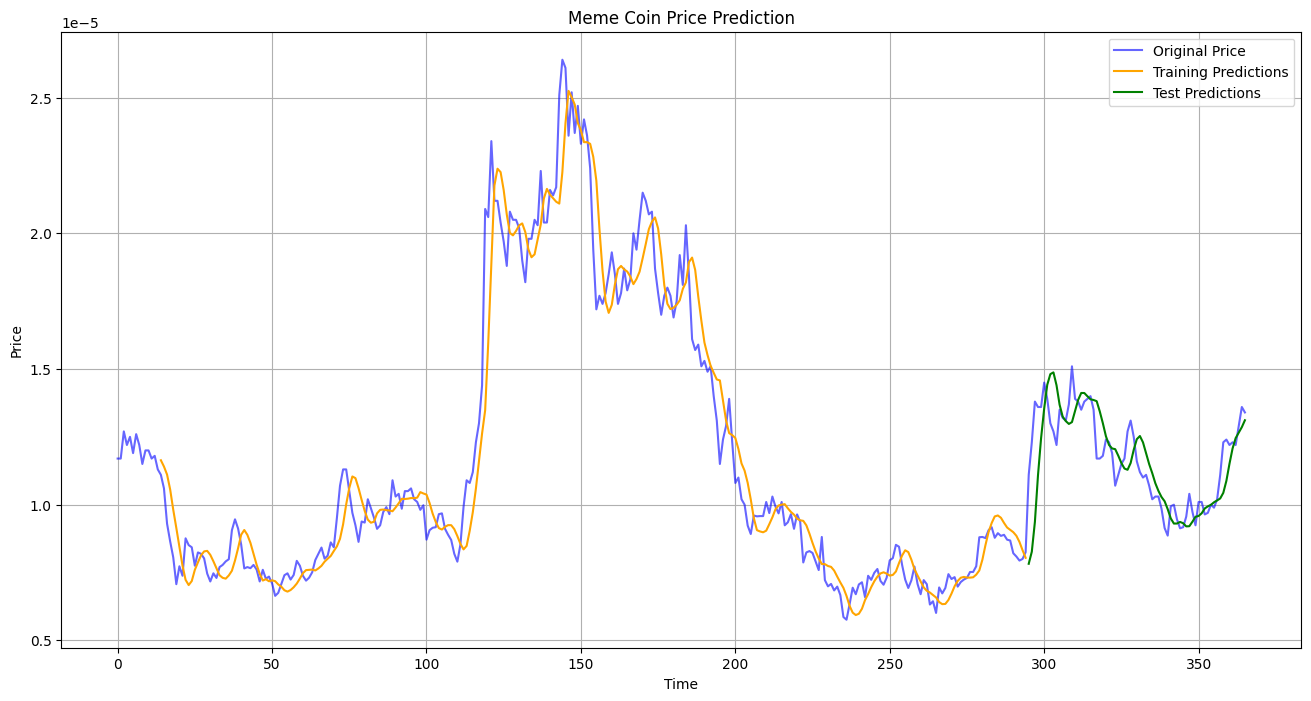

Visualizing model loss...


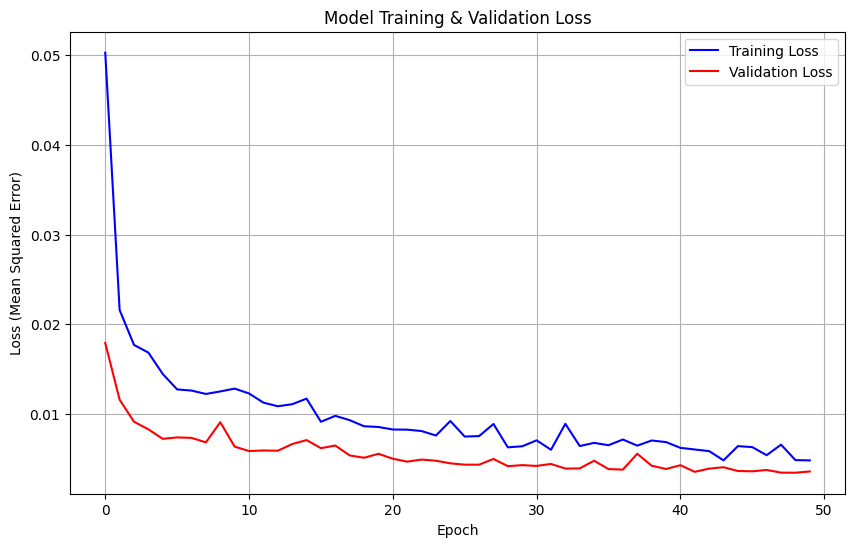

In [ ]:
# --- Configuration ---
CSV_FILE_PATH = 'training_data/pepe_final.csv'  
TIME_STEP = 14
TRAIN_SPLIT = 0.8  # 80% of data for training, 20% for testing.

def load_and_preprocess_data(file_path):
    """
    Loads data from a CSV, handles missing values, and selects features.
    """
    print("Loading and preprocessing data...")
    df = pd.read_csv(file_path)

    feature_columns = [
        'price', 'reddit_sentiment_score', 'twitter_sentiment_score',
        'open', 'high', 'low', 'close'
    ]
    
    for col in feature_columns:
        if col not in df.columns:
            df[col] = np.nan
            print(f"Warning: Column '{col}' not found in CSV. It will be treated as missing data.")

    df_features = df[feature_columns]

    for col in ['open', 'high', 'low', 'close']:
        df_features[col].fillna(df_features['price'], inplace=True)

    df_features.dropna(inplace=True)

    if df_features.empty:
        raise ValueError("No data left after cleaning. Please check your CSV for missing values in essential columns.")

    print("Data preprocessing complete.")
    return df_features


def create_sequences(data, time_step):
    """
    Converts the dataset into input sequences (X) and output values (y).
    """
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), :])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)


def build_lstm_model(input_shape):
    """
    Builds and compiles the LSTM model.
    """
    print("Building LSTM model...")
    model = Sequential([
        LSTM(units=50, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(units=50, return_sequences=True),
        Dropout(0.2),
        LSTM(units=50),
        Dropout(0.2),
        Dense(units=1)
    ])
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    print("Model built successfully.")
    model.summary()
    return model

# --- Main Execution ---

if __name__ == '__main__':
    try:
        data_df = load_and_preprocess_data(CSV_FILE_PATH)
    except FileNotFoundError:
        print(f"Error: The file '{CSV_FILE_PATH}' was not found.")
        exit()
    except Exception as e:
        print(f"An error occurred: {e}")
        exit()

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data_df)

    X, y = create_sequences(scaled_data, TIME_STEP)
    
    training_size = int(len(X) * TRAIN_SPLIT)
    X_train, X_test = X[:training_size], X[training_size:]
    y_train, y_test = y[:training_size], y[training_size:]

    print(f"\nTraining data shape: {X_train.shape}")
    print(f"Testing data shape: {X_test.shape}")

    model = build_lstm_model(input_shape=(X_train.shape[1], X_train.shape[2]))

    print("\nTraining the model...")
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

    print("Making predictions...")
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)

    # Inverse transform the predictions
    dummy_train = np.zeros((len(train_predict), data_df.shape[1]))
    dummy_train[:, 0] = train_predict.flatten()
    train_predict_unscaled = scaler.inverse_transform(dummy_train)[:, 0]
    
    dummy_test = np.zeros((len(test_predict), data_df.shape[1]))
    dummy_test[:, 0] = test_predict.flatten()
    test_predict_unscaled = scaler.inverse_transform(dummy_test)[:, 0]

    print("Visualizing prediction results...")
    plt.figure(figsize=(16, 8))
    plt.title('Meme Coin Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Price')
    
    original_prices = data_df['price'].values
    plt.plot(original_prices, label='Original Price', color='blue', alpha=0.6)
    
    # Plotting training predictions
    train_predict_plot = np.empty_like(original_prices)
    train_predict_plot[:] = np.nan
    train_predict_plot[TIME_STEP:len(train_predict_unscaled) + TIME_STEP] = train_predict_unscaled
    plt.plot(train_predict_plot, label='Training Predictions', color='orange')

    # Plotting test predictions
    test_predict_plot = np.empty_like(original_prices)
    test_predict_plot[:] = np.nan
    test_start_index = len(train_predict_unscaled) + TIME_STEP
    test_predict_plot[test_start_index : test_start_index + len(test_predict_unscaled)] = test_predict_unscaled
    plt.plot(test_predict_plot, label='Test Predictions', color='green')
    
    plt.legend()
    plt.grid(True)
    plt.show()

    print("Visualizing model loss...")
    plt.figure(figsize=(10, 6))
    plt.title('Model Training & Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (Mean Squared Error)')
    
    # Plot training loss
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    # Plot validation loss
    plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
    
    plt.legend()
    plt.grid(True)
    plt.show()


Predictions seem to post date the actual price by 1-2 days. It appears that social media buzz is more of a reaction than an actual predictor of meme coins. Further testing is required. 

From the lsos graph, there does not seem to be an indication of overtraining which indicates that the models is still trained properly